# Summative Portfolio Project 1


This notebook creates a summarised speadsheet of monthly KPIs collected from multiple sources across Health Data Research UK.

The output is an exel file with summary statistics that can be used by colleagues to view current metrics, and compare those over time. 

First, run the following cell to:

- import `pandas` with an alias of `pd`
-import visualisation packages and set plotting styling
- read a CSV containing the HDR UK publication data directly from a URL (using 'requests')
- create a DataFrame `df` containing the data
- take a look at the first few rows of the DataFrame


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json

url= 'https://hdruk.github.io/papers/data/papers.csv'
r=requests.get(url)
open('papers.csv', 'wb').write(r.content)

df = pd.read_csv('papers.csv')
df.head()

,id,doi,title,authorString,authorAffiliations,journalTitle,pubYear,date,isOpenAccess,keywords,nationalPriorities,healthCategories,abstract,laySummary,urls
0,35057841,https://doi.org/10.1186/s13063-021-05965-4,Development and evaluation of rapid data-enabl...,"Cake C, Ogburn E, Pinches H, Coleman G, Seymou...",NaN,Trials,2022,2022-01-20,Y,Recruitment; Data; Clinical Trials; Primary Ca...,NaN,NaN,<h4>Background</h4>The COVID-19 pandemic has p...,NaN,doi:https://doi.org/10.1186/s13063-021-05965-4...
1,35110546,https://doi.org/10.1038/s41467-022-28248-1,"A population-based cohort study of obesity, et...","Yates T, Summerfield A, Razieh C, Banerjee A, ...",NaN,Nature communications,2022,2022-02-02,Y,NaN,NaN,NaN,Obesity and ethnicity are known risk factors f...,NaN,doi:https://doi.org/10.1038/s41467-022-28248-1...
2,35192598,https://doi.org/10.1371/journal.pmed.1003927,First dose ChAdOx1 and BNT162b2 COVID-19 vacci...,"Kerr S, Joy M, Torabi F, Bedston S, Akbari A, ...",NaN,PLoS medicine,2022,2022-02-22,Y,NaN,NaN,NaN,<h4>Background</h4>Several countries restricte...,NaN,doi:https://doi.org/10.1371/journal.pmed.10039...
3,34301672,https://doi.org/10.1136/bmjopen-2021-053402,Sociodemographic inequality in COVID-19 vaccin...,"Nafilyan V, Dolby T, Razieh C, Gaughan CH, Mor...",NaN,BMJ open,2021,2021-07-23,Y,Infection control; epidemiology; Covid-19,NaN,NaN,<h4>Objective</h4>To examine inequalities in C...,NaN,doi:https://doi.org/10.1136/bmjopen-2021-05340...
4,35690576,https://doi.org/10.1016/s2589-7500(22)00091-7,COVID-19 trajectories among 57 million adults ...,"Thygesen JH, Tomlinson C, Hollings S, Mizani M...",NaN,The Lancet. Digital health,2022,2022-06-09,Y,NaN,NaN,NaN,<h4>Background</h4>Updatable estimates of COVI...,NaN,doi:https://doi.org/10.1016/S2589-7500(22)0009...


`df` now has one row of data for each publication. 
Take a look at the datatypes for each column.

In [2]:
df.dtypes

id                     object
doi                    object
title                  object
authorString           object
authorAffiliations    float64
journalTitle           object
pubYear                 int64
date                   object
isOpenAccess           object
keywords               object
nationalPriorities     object
healthCategories       object
abstract               object
laySummary             object
urls                   object
dtype: object

## 1. Tidy Data

The dataset has columns that are not needed and (as noted above) date is an object.

Starting from a copy of `df`, create a new dataFrame called `clean_df` with the following changes:
- Drop the 'id', 'keywords', 'pubYear' 'authorAffiliations','nationaPriorities', 'healthCategories', 'laySumamry', and 'urls' columns
- Change column data type for 'date' to datetime format Y-M-D. Ensure any errors are marked as 'not a time'
-Change column data type for 'isOpenAccess' to binary




In [3]:
clean_df=df.copy()
clean_df.drop(["keywords", "id", "pubYear", "authorAffiliations", "nationalPriorities", "healthCategories", "laySummary", "urls"], axis=1, inplace=True)
clean_df['date'] = pd.to_datetime(clean_df['date'], format='%Y-%m-%d', errors='coerce')
clean_df.rename(columns={'date': 'Month'}, inplace=True) #doing this as part of cleaning - will limit to month only in later steps
clean_df['isOpenAccess'] = clean_df['isOpenAccess'].map({'Y': 1, 'N': 0})

Check the data types of your new DataFrame to confirm columns removed and datatypes converted.

In [4]:
clean_df.dtypes

doi                     object
title                   object
authorString            object
journalTitle            object
Month           datetime64[ns]
isOpenAccess             int64
abstract                object
dtype: object

## 2. Analyse dataset for KPIs
Create a new DataFrame titled 'publications' that contains data from 2022 only. Order this DataFrame by `date`, with the most recent at the top.

In [5]:
publications=clean_df[clean_df['Month'].dt.strftime('%Y') == '2022'].sort_values(by='Month', ascending=False)
publications.tail()

,doi,title,authorString,journalTitle,Month,isOpenAccess,abstract
563,https://doi.org/10.1016/s2666-7568(21)00281-6,The importance of blood pressure thresholds ve...,"Herrett E, Strongman H, Gadd S, Tomlinson L, N...",The Lancet. Healthy longevity,2022-01-01,1,"<h4>Background</h4>For five decades, blood pre..."
571,https://doi.org/10.1093/dote/doab058,Demographic and lifestyle risk factors for gas...,"Wang SE, Kendall BJ, Hodge AM, Dixon-Suen SC, ...",Diseases of the esophagus : official journal o...,2022-01-01,0,We examined demographic and lifestyle risk fac...
691,https://doi.org/10.1093/eurheartj/ehab759,A sex-specific prediction model is not enough ...,"Kimenai DM, Shah ASV, Mills NL.",European heart journal,2022-01-01,1,NaN
746,https://doi.org/10.1167/tvst.11.1.3,OCT Assisted Quantification of Vitreous Inflam...,"Liu X, Kale AU, Ometto G, Montesano G, Sitch A...",Translational vision science & technology,2022-01-01,1,<h4>Purpose</h4>Vitreous haze (VH) is a key ma...
479,https://doi.org/10.1097/ta.0000000000003317,Association between type 2 diabetes and long-t...,"Daly SL, Gabbe BJ, Climie RE, Ekegren CL.",The journal of trauma and acute care surgery,2022-01-01,0,<h4>Background</h4>Diabetes is associated with...


Using the `publications` DataFrame we created earlier, find:
-the total number of publications for each month
-the % of publications for each month which are Open Access

In [6]:
counts =publications.groupby(publications.Month.dt.month_name())['doi'].count() #number of publications per month
counts = counts.sort_index(key=lambda x: pd.to_datetime(x, format="%B")) #orders months chronolgically 


OA= publications.groupby(publications.Month.dt.month_name())['isOpenAccess'].value_counts(normalize=True)*100
OA=OA.xs(1, level=1) #filters the percentages on (1) which is equivalent it 'Yes is OA'
OA = OA.sort_index(key=lambda x: pd.to_datetime(x, format="%B")) #orders months chronolgically 


print(counts)
print(OA)
              


Month
January     65
February    54
March       49
April       48
May         46
June        22
Name: doi, dtype: int64
Month
January     76.923077
February    79.629630
March       89.795918
April       83.333333
May         69.565217
June        63.636364
Name: isOpenAccess, dtype: float64


## 3. Analyse dataset for 'new' KPIs
Create a list of DOIs from the publications dataframe to be inputted into the CrossRef API (using the habanero package) and return citation counts for each DOI.  

In [7]:
list_of_DOIs = publications['doi'].tolist()
list_of_DOIs = ','.join(list_of_DOIs).replace('https://doi.org/','').split() #format DOIs as required by CrossRef API (remove https..)
list_of_DOIs


['10.1111/1747-0080.12746,10.1126/science.abq4411,,10.1038/s41588-022-01126-8,10.1002/cam4.4941,,10.1016/j.kint.2022.05.015,10.1161/jaha.121.024248,10.1186/s12916-022-02399-w,10.1038/s42003-022-03448-z,10.3390/jpm12060958,10.1016/s2665-9913(22)00098-4,10.1186/s12933-022-01525-5,10.1016/s2589-7500(22)00091-7,10.1016/j.vaccine.2022.06.010,10.1371/journal.pone.0268837,10.1016/j.jamda.2022.05.003,10.1186/s41512-022-00124-y,10.1093/ndt/gfac040,10.1111/bjhp.12606,10.1038/s41591-022-01781-8,10.1093/rheumatology/keac283,10.1093/ehjci/jeac101,10.1038/s41533-022-00280-0,10.1186/s12889-022-13453-w,10.2196/32543,10.1371/journal.pmed.1004015,10.1093/eurheartj/ehac238,10.1136/heartjnl-2021-320325,10.1186/s12889-022-13457-6,10.1371/journal.pone.0267176,10.1038/s41593-022-01074-w,10.1016/s0140-6736(22)00532-3,10.1016/j.eclinm.2022.101462,10.1016/j.ejrad.2022.110366,10.1038/s41598-022-12517-6,10.1136/bmjopen-2021-057343,10.1371/journal.pmed.1003981,10.1136/bmj-2022-070904,10.1038/s41591-022-01772-9,10.

In [8]:
#loop test 
citations = list() # stores responses for citations

for doi in list_of_DOIs:
   responses = requests.get('https://api.crossref.org/v1/works/{}'.format(doi))
   data=json.loads(responses.text)
   citations.append(data)

## 4. Create outputs 
Generate a csv file containing the KPIs and create visuals for ease of conspumption by colleagues.

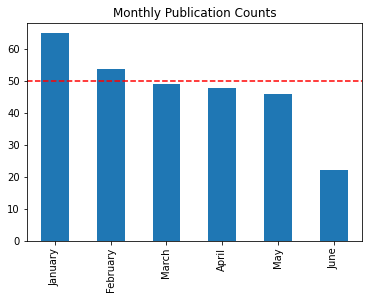

In [9]:
#create a figure showing number of publications by month
plt.figure()
publications_bar = counts.plot(kind='bar', title='Monthly Publication Counts')
publications_bar.set(xlabel=None)
plt.axhline(y=50, color='r', linestyle='--') #adds target line

plt.savefig("Publications.png") # save as png (check folder you are working in)

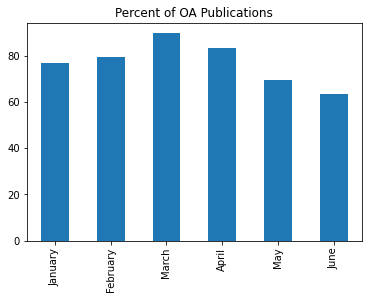

In [10]:
#create a figure showing %OA publications by month
plt.figure()
OA_bar = OA.plot(kind='bar', title='Percent of OA Publications')
OA_bar.set(xlabel=None)

plt.savefig("PercentOA.png") # save as png (check folder you are working in)


In [11]:
#join publication counts and OA into a single DF and export as a csv file
data = {"Publications": counts,
        "Percent Open Access": OA}
monthly_KPIs= pd.concat(data, axis=1)
monthly_KPIs.tail()

,Publications,Percent Open Access
Month,,
February,54,79.629630
March,49,89.795918
April,48,83.333333
May,46,69.565217
June,22,63.636364


In [12]:
#naming files with a timestamp
import time

TodaysDate = time.strftime("%d-%m-%Y")
publicationsfilename = "publications"+ TodaysDate +".xlsx" 
KPIsfilename = "monthly_KPIs"+ TodaysDate +".xlsx"

clean_df.to_excel(publicationsfilename, index=False)  #this has created an xls file in the same directory you are working in (check downloads)
monthly_KPIs.to_excel(KPIsfilename) #this has created an xls file in the same directory you are working in (check downloads)

## 5. Housekeeping
Create a list of dependencies as best practise - using the watermark IPython magic extension for printing date and time stamps, version numbers, and hardware information.

In [14]:
import sys
!{sys.executable} -m pip install watermark
%load_ext watermark 

In [16]:
%watermark 
%watermark --iversions 

Last updated: 2022-06-30T09:47:16.307589+01:00

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
CPU cores   : 8
Architecture: 64bit

matplotlib: 3.3.4
requests  : 2.25.1
sys       : 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
json      : 2.0.9
pandas    : 1.2.4

